In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
train = pd.read_csv('/content/Titanic-Dataset.csv')
test = pd.read_csv('/content/Titanic-Dataset.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#checking for missing values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#dropping of records with embarked column as null
train.dropna(axis=0,subset=['Embarked'],inplace=True)

In [ ]:

# Selecting target, numeric and categorical data
y = train.Survived

# Creating cabin class column based on first letter of "Cabin"
train['Cabin_Class'] = train.Cabin.apply(lambda x:str(x)[0])

# Select discrete columns
discrete_cols = ['Pclass','Sex','SibSp','Parch','Embarked','Cabin_Class']

# Select continuous columns
continuous_cols = ['Age','Fare']

# Keep selected columns only
total_cols = discrete_cols + continuous_cols
X = train[total_cols].copy()

print("Discrete Columns:", discrete_cols)
print("Continuous Columns:", continuous_cols)
print("Total Columns:", total_cols)

Discrete Columns: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Cabin_Class']
Continuous Columns: ['Age', 'Fare']
Total Columns: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Cabin_Class', 'Age', 'Fare']


In [ ]:
#basic data exploration
for cat_col in discrete_cols:
    print(pd.pivot_table(train, index='Survived',columns=cat_col,values='Ticket',aggfunc='count'),'\n')

Pclass      1   2    3
Survived              
0          80  97  372
1         134  87  119 

Sex       female  male
Survived              
0             81   468
1            231   109 

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         208.0  112.0  13.0   4.0   3.0  NaN  NaN 

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         231.0  65.0  40.0  3.0  NaN  1.0  NaN 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 

Cabin_Class    A     B     C     D     E    F    G    T      n
Survived                                                      
0            8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1            7.0  33.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0 



<Axes: xlabel='Fare', ylabel='Count'>

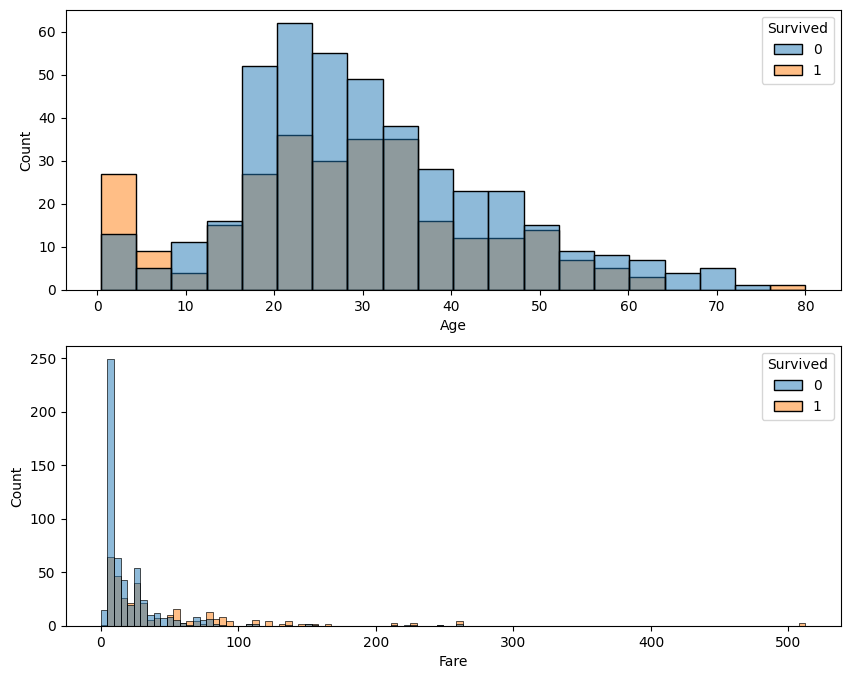

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.histplot(data=train, x='Age', hue='Survived')
plt.subplot(212)
sns.histplot(data=train, x='Fare', hue='Survived')

In [ ]:
from sklearn.impute import SimpleImputer

# Impute Age with mean age
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X['Age'] = imputer.fit_transform(X[['Age']])

# Normalise fare as fare does not look like a normal distribution
to_normalise = X[['Fare']]

# Z-score normalisation
X['Fare_Normalised'] = (to_normalise - to_normalise.mean()) / to_normalise.std()
X.dropna(axis=0,subset=['Fare'],inplace=True)

X.isna().sum()

Pclass             0
Sex                0
SibSp              0
Parch              0
Embarked           0
Cabin_Class        0
Age                0
Fare               0
Fare_Normalised    0
dtype: int64

In [ ]:
# Change Pclass, SibSp, and Parch into string
X.Pclass = train.Pclass.apply(lambda x:str(x))
X.SibSp = train.SibSp.apply(lambda x:str(x))
X.Parch = train.Parch.apply(lambda x:str(x))

# Get dummy columns
dummy_cols = pd.get_dummies(X[discrete_cols])

# Create training set
X_transform = dummy_cols.join(X[['Age','Fare_Normalised']])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_val, y_train, y_val = train_test_split(X_transform, y, test_size=0.25, random_state=1)
lr = LogisticRegression(solver='newton-cholesky',penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
metrics.accuracy_score(y_pred,y_val)

0.8654708520179372

In [ ]:
test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Create cabin class column based on first letter of "Cabin"
test['Cabin_Class'] = test.Cabin.apply(lambda x:str(x)[0])
X_test = test[total_cols]

# Impute Age with mean
X_test['Age'] = imputer.fit_transform(X_test[['Age']])

# Normalise fare as fare does not look like a normal distribution
test_fare_normalise = X_test[['Fare']]

# Z-score normalisation
X_test['Fare_Normalised'] = (test_fare_normalise - test_fare_normalise.mean()) / test_fare_normalise.std()
X_test['Fare_Normalised'] = imputer.fit_transform(X_test[['Fare_Normalised']])

X_test.Pclass = X_test.Pclass.apply(lambda x:str(x))
X_test.SibSp = X_test.SibSp.apply(lambda x:str(x))
X_test.Parch = X_test.Parch.apply(lambda x:str(x))
# Get dummy columns
dummy_cols = pd.get_dummies(X_test[discrete_cols])

# Create training set
X_test_transform = dummy_cols.join(X_test[['Age','Fare_Normalised']])

<ipython-input-35-5558dab38b94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = imputer.fit_transform(X_test[['Age']])
<ipython-input-35-5558dab38b94>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare_Normalised'] = (test_fare_normalise - test_fare_normalise.mean()) / test_fare_normalise.std()
<ipython-input-35-5558dab38b94>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
X_test_transform.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Class_A',
       'Cabin_Class_B', 'Cabin_Class_C', 'Cabin_Class_D', 'Cabin_Class_E',
       'Cabin_Class_F', 'Cabin_Class_G', 'Cabin_Class_T', 'Cabin_Class_n',
       'Age', 'Fare_Normalised'],
      dtype='object')

In [ ]:
#false_list = [False for _ in range(len(X_test_transform))]
#X_test_transform = X_test_transform.drop('Parch_9', axis=1)
#X_test_transform.insert(X_train.columns.get_loc('Cabin_Class_T'),'Cabin_Class_T', false_list)

In [ ]:
X_train.columns == X_test_transform.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
X_test_transform.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_Class_A',
       'Cabin_Class_B', 'Cabin_Class_C', 'Cabin_Class_D', 'Cabin_Class_E',
       'Cabin_Class_F', 'Cabin_Class_G', 'Cabin_Class_T', 'Cabin_Class_n',
       'Age', 'Fare_Normalised'],
      dtype='object')

In [ ]:
predictions = lr.predict(X_test_transform)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('/content/submission.csv', index=False)

In [ ]:
print("your submission was succesffully done ")

your submission was succesffully done 


In [1]:
print("titanic data set is manipulated sucessfully")

titanic data set is manipulated sucessfully
